In [22]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from IPython import display
display.set_matplotlib_formats('svg')  # 将图片格式转换成svg格式，清晰

C:\Users\OneRaise\AppData\Local\Temp\ipykernel_4200\2692527289.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')  # 将图片格式转换成svg格式，清晰


In [23]:
data = pd.read_feather('data/house_sales.ftr')

In [24]:
data.shape

(164944, 1789)

In [25]:
data.head()

,Id,Address,Sold Price,Sold On,Summary,Type,Year built,Heating,Cooling,Parking,...,Well Disclosure,remodeled,DOH2,SerialX,Full Baths,Tax Legal Lot Number,Tax Legal Block Number,Tax Legal Tract Number,Building Name,Zip
0,2080183300,"11205 Monterey,","$2,000,000",01/31/20,"11205 Monterey, San Martin, CA 95046 is a sing...",SingleFamily,No Data,No Data,No Data,0 spaces,...,None,None,None,None,None,None,None,None,None,95046
1,20926300,"5281 Castle Rd,","$2,100,000",02/25/21,Spectacular Mountain and incredible L.A. City ...,SingleFamily,1951,Central,"Central Air, Dual","Driveway, Driveway - Brick",...,None,None,None,None,None,None,None,None,None,91011
2,19595300,"3581 Butcher Dr,","$1,125,000",11/06/19,Eichler Style home! with Santa Clara High! in ...,SingleFamily,1954,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached, Covered",...,None,None,None,None,None,None,None,None,None,95051
3,300472200,"2021 N Milpitas Blvd,","$36,250,000",10/02/20,"2021 N Milpitas Blvd, Milpitas, CA 95035 is a ...",Apartment,1989,Other,No Data,"Mixed, Covered",...,None,None,None,None,None,None,None,None,None,95035
4,2074492000,"LOT 4 Tool Box Spring Rd,","$140,000",10/19/20,Beautiful level lot dotted with pine trees ro...,VacantLand,No Data,No Data,No Data,0 spaces,...,None,None,None,None,None,None,None,None,None,92561


In [26]:
# 删掉有30%或更多缺失值的数据
null_sum = data.isnull().sum()
data.columns[null_sum < len(data) * 0.3]  # 需要保留的列

Index(['Id', 'Address', 'Sold Price', 'Sold On', 'Summary', 'Type',
       'Year built', 'Heating', 'Cooling', 'Parking', 'Bedrooms', 'Bathrooms',
       'Total interior livable area', 'Total spaces', 'Garage spaces',
       'Home type', 'Region', 'Elementary School', 'Elementary School Score',
       'Elementary School Distance', 'High School', 'High School Score',
       'High School Distance', 'Heating features', 'Parking features',
       'Lot size', 'Parcel number', 'Tax assessed value', 'Annual tax amount',
       'Listed On', 'Listed Price', 'Zip'],
      dtype='object')

In [27]:
# 删除缺失值大于30%的列
data.drop(columns=data.columns[null_sum > len(data) * 0.3], inplace=True)

In [31]:
# 查看每一列的数据类型
data.dtypes

Id                              object
Address                         object
Sold Price                     float64
Sold On                         object
Summary                         object
Type                            object
Year built                      object
Heating                         object
Cooling                         object
Parking                         object
Bedrooms                        object
Bathrooms                       object
Total interior livable area    float64
Total spaces                    object
Garage spaces                   object
Home type                       object
Region                          object
Elementary School               object
Elementary School Score         object
Elementary School Distance      object
High School                     object
High School Score               object
High School Distance            object
Heating features                object
Parking features                object
Lot size                 

In [29]:
# 将价钱相关的列的数据转化成浮点型
currency = ['Sold Price', 'Listed Price', 'Tax assessed value', 'Annual tax amount']
for c in currency:
    data[c] = data[c].replace(r'[$,-]', '', regex=True)
    data[c] = data[c].replace(r'^\s*$', np.nan, regex=True)
    data[c] = data[c].astype(float)

# 将面积大小相关的列转换成浮点型
areas = ['Total interior livable area', 'Lot size']
for c in areas:
    acres = data[c].str.contains('Acres') == True
    col = data[c].replace(r'\b sqft\b|\b Acres\b|\b,\b', '', regex=True).astype(float)
    col[acres] *= 43560
    data[c] = col

In [30]:
data.describe()

,Sold Price,Total interior livable area,Lot size,Tax assessed value,Annual tax amount,Listed Price
count,1.648590e+05,1.465450e+05,1.358450e+05,1.450650e+05,1.433500e+05,1.250060e+05
mean,1.194842e+06,3.182221e+03,9.525061e+05,8.898781e+05,1.123415e+04,1.197671e+06
std,3.336365e+06,4.609881e+05,1.357197e+08,3.126888e+06,3.859389e+04,2.874721e+06
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.350000e+05,1.170000e+03,4.800000e+03,2.550000e+05,3.434250e+03,4.990000e+05
50%,8.050000e+05,1.558000e+03,6.603000e+03,5.635010e+05,7.372000e+03,8.490000e+05
75%,1.370000e+06,2.144000e+03,1.209000e+04,1.033832e+06,1.321300e+04,1.395000e+06
max,8.660000e+08,1.764164e+08,4.856770e+10,8.256328e+08,9.977342e+06,6.250000e+08


In [33]:
# 对房子简单处理
# 在做数据处理是，清理掉一半甚至三分之二的数据都是正常的
abnormal = (data[areas[1]] < 10) | (data[areas[1]] > 1e4)
data = data[~abnormal]
sum(abnormal)

41000

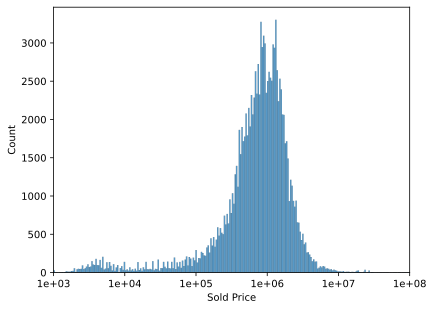

In [44]:
# 根据价格分布绘图
ax = sns.histplot(np.log10(data['Sold Price']))
ax.set_xlim([3, 8])
ax.set_xticks(range(3, 9))
ax.set_xticklabels(['%.0e'%a for a in 10**ax.get_xticks()]);

In [47]:
# 房子种类
data['Type'].value_counts()[0:20]

Type
SingleFamily            74318
Condo                   18749
MultiFamily              6586
VacantLand               6199
Townhouse                5846
Unknown                  5390
MobileManufactured       2588
Apartment                1416
Cooperative               161
Residential Lot            75
Single Family              69
Single Family Lot          56
Acreage                    48
2 Story                    39
3 Story                    25
Hi-Rise (9+), Luxury       21
RESIDENTIAL                19
Duplex                     19
Condominium                19
Mid-Rise (4-8)             17
Name: count, dtype: int64

c:\Users\OneRaise\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


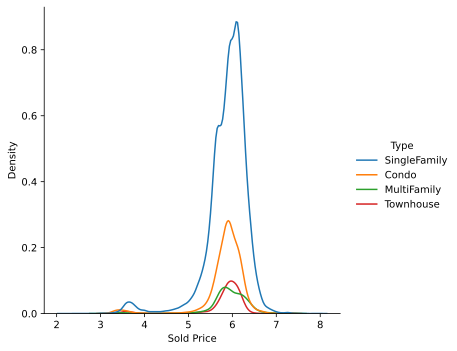

In [53]:
# 不同类别房子价格的分类
types = data['Type'].isin(['SingleFamily', 'Condo', 'MultiFamily', 'Townhouse'])
sns.displot(pd.DataFrame({'Sold Price':np.log10(data[types]['Sold Price']),
                          'Type':data[types]['Type']}),
                          x='Sold Price', hue='Type', kind='kde')

(0.0, 2000.0)

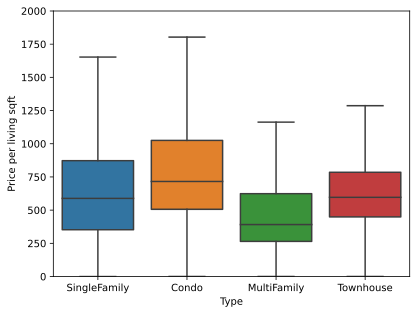

In [54]:
# 每平米价格
# 箱线图
data['Price per living sqft'] = data['Sold Price'] / data['Total interior livable area']
ax = sns.boxplot(x='Type', y='Price per living sqft', data=data[types], fliersize=0)
ax.set_ylim([0, 2000])

[Text(0, 0, '95118'),
 Text(1, 0, '94043'),
 Text(2, 0, '95131'),
 Text(3, 0, '94110'),
 Text(4, 0, '94123'),
 Text(5, 0, '90003'),
 Text(6, 0, '94114'),
 Text(7, 0, '95123'),
 Text(8, 0, '94118'),
 Text(9, 0, '94122'),
 Text(10, 0, '95122'),
 Text(11, 0, '94103'),
 Text(12, 0, '90011'),
 Text(13, 0, '94117'),
 Text(14, 0, '94089'),
 Text(15, 0, '94112'),
 Text(16, 0, '94131'),
 Text(17, 0, '94115'),
 Text(18, 0, '94121'),
 Text(19, 0, '94116')]

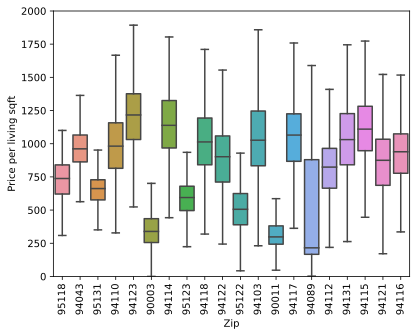

In [57]:
# 每个地方价格的分布
d = data[data['Zip'].isin(data['Zip'].value_counts()[:20].keys())]
ax = sns.boxplot(x='Zip', y='Price per living sqft', data=d, fliersize=0)
ax.set_ylim([0, 2000])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

<Axes: >

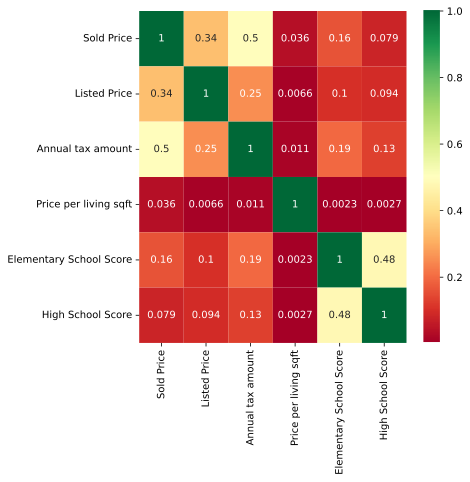

In [58]:
# 协方差矩阵
_, ax = plt.subplots(figsize=(6,6))
columns = ['Sold Price', 'Listed Price', 'Annual tax amount', 'Price per living sqft',
           'Elementary School Score', 'High School Score']
sns.heatmap(data[columns].corr(), annot=True, cmap='RdYlGn', ax=ax)